This notebook is the reproduction of an exercise found at http://people.ku.edu/~gbohling/cpe940/Kriging.pdf

In [1]:
import sys
sys.path.append('..')
sys.path.append('../geostatsmodels')

In [2]:
from geostatsmodels import utilities, variograms, model, kriging, geoplot
import matplotlib.pyplot as plt
import numpy as np
import pandas

We'll read the data from `ZoneA.dat`.

In [3]:
z = utilities.readGeoEAS('../data/ZoneA.dat')

We want the first, second and fourth columns of the data set, representing the x and y spatial coordinates, and the porosity.

In [4]:
P = z[:,[0,1,3]]

We'll be interested in determining the porosity at a point (2000,4700).

In [5]:
pt = [2000, 4700]

We can plot our region of interest as follows:

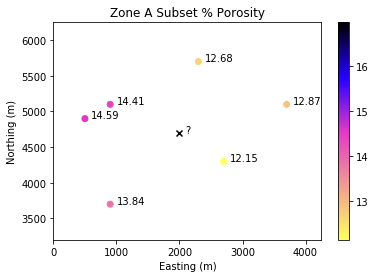

In [6]:
plt.scatter(P[:,0], P[:,1], c=P[:,2], cmap=geoplot.YPcmap)
plt.title('Zone A Subset % Porosity')
plt.colorbar()
xmin, xmax = 0, 4250
ymin, ymax = 3200, 6250
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
for i in range(len(P[:,2])):
    x, y, por = P[i]
    if (x < xmax) & (y > ymin) & (y < ymax):
        plt.text( x+100, y, '{:4.2f}'.format( por ) ) 
plt.scatter(pt[0], pt[1], marker='x', c='k')
plt.text(pt[0] + 100 , pt[1], '?')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)');

We can determine the parameters for our model by looking at the semivariogram and trying to determine the appropriate range and sill.

In [7]:
tolerance = 250
lags = np.arange(tolerance, 10000, tolerance*2)
sill = np.var(P[:,2])

The semivariogram plotting function, `svplot()`, plots sill as a dashed line, and the empirical semivariogram as determined from the data. It optionally plots a semivariance model.

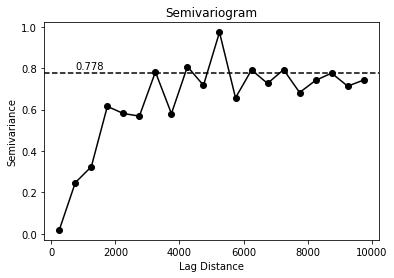

In [8]:
geoplot.semivariogram(P, lags, tolerance)

We can pass a model to this function using the optional `model` argument and see it plotted in red.

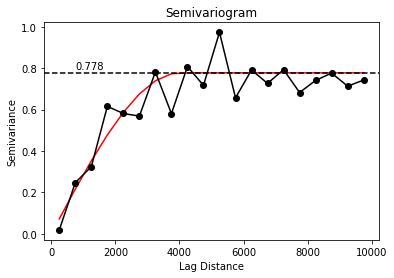

In [9]:
svm = model.semivariance(model.spherical, (4000, sill))
geoplot.semivariogram(P, lags, tolerance, model=svm)

The covariance modeling function function will return a spherical covariance model that takes a distance as input, and returns an covariance estimate. We've used the global variance of the porosity in `ZoneA.dat` as the sill.

In [10]:
covfct = model.covariance(model.spherical, (4000, sill))

We can then krige the data, using the covariance model, the point we are interested in, (2000,47000), and `N=6` signifying that we only want to use the six nearest points. The output of the simple and ordinary kriging functions below is the krigin estimate, and the standard deviation of the kriging estimate.

In [11]:
kriging.simple(P, covfct, pt, N=6)

(12.826498066190497, 0.49628540680221894)

In [12]:
kriging.ordinary(P, covfct, pt, N=6)

(12.931216562350736, 0.4986494585776898)

In [13]:
est, kstd = kriging.krige(P, covfct, [[2000,4700],[2100,4700],[2000,4800],[2100,4800]], 'simple', N=6)

In [14]:
est

array([[12.82649807],
       [12.71773246],
       [12.83938422],
       [12.73159357]])

In [15]:
kstd

array([[0.49628541],
       [0.48591652],
       [0.49470641],
       [0.48637714]])